In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 27 13:12:45 2018
@author: fj123
@description: This script encode all the midi music in the collected dataset into the 
desined data representation. The encoded data representations will be saved in .npy format
under the same directory of the midi file.
"""

import utils
import numpy as np
import os

# load all the data paths in the midi dataset.
#path = '..\\midis\\'
path = 'Jazzomat MIDI'
try:
    data_paths = [os.path.join(path, o) \
                  for o in os.listdir(path) \
                  if os.path.isdir(os.path.join(path, o))]
except OSError as e:
    print('Error: Invalid datapath!!!')

# convert all the midis into data representation and save as .npy file.
# the encoded data file will be monophinic and wrapped within one octave.
for data_path in data_paths:
    midi_files = utils.get_file_paths(data_path)
    
    for midi_file in midi_files:
        #data_cur = utils.load_data(midi_file)
        #utils.to_monophonic(data_cur)
        #data_cur = utils.to_octave(data_cur)
        
        datafile = midi_file[:len(midi_file) - 4] + '.npy'
        np.save(datafile, data_cur)

456 midifiles found.


NameError: name 'data_cur' is not defined

# Feeding Jazzomat Dataset
456 midi files from different jazz artists

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 27 13:12:45 2018
@author: fj123
@description: This script will copy the encoded data representations in the dataset into 
data\\train and data\\validation folders. The dividing portion for train and validation 
will be 4:1.
"""

import os
import utils
import numpy as np

# get all the datapaths in the dataset
#path = '..\\midis\\'
path = 'Jazzomat MIDI'
try:
    data_paths = [os.path.join(path, o) \
                  for o in os.listdir(path) \
                  if os.path.isdir(os.path.join(path, o))]
except OSError as e:
    print('Error: Invalid datapath!!!')

count = 0
#data_paths = func
# copy the data files in to data\\train and data\\validation
# the file names are changed to be index numbers of the music pieces.
for data_path in data_paths:
    midi_datas = utils.get_data_paths(data_path)
    
    for midi_data in midi_datas:

    	data_cur = np.load(midi_data)
    	if count % 5 == 4:
    		np.save('data\\validation\\{}.npy'.format(count), data_cur)
    	else:
    		np.save('data\\train\\{}.npy'.format(count), data_cur)

    	count += 1

    print(data_path + ' done!')

456 data files found.
Jazzomat MIDI\all done!


# Split data into training/validation, then __TRAINING__

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jul 15 11:16:10 2018
@author: fj123
@description: Use this script to train the model~=v=~
"""
#tensorflow.keras.layers


import os
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback
import numpy as np
import matplotlib.pyplot as plt
import utils

# lstm autoencoder recreate sequence
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.utils import plot_model

# define constants
NUMBER_FEATURES_OCTAVE = utils.NUMBER_FEATURES_OCTAVE # 12 midi_notes + sustain + rest + beat_start
NUMBER_FEATURES = utils.NUMBER_FEATURES # 128 midi_notes + sustain + rest + beat_start
INSTRUMENTS = utils.INSTRUMENTS # number of instruments in midifile

# parameters setting =v=
num_steps = 3
steps_per_epoch = 3
batch_size = 128 #orig 256
skip_step = 3
lr = 0.01
dropout = 0.4
decay_rate = 0.2 ** 6
vocabulary = 14
embedding_size = 16 #16
hidden_size = 128
num_epochs = 50 #antes 50

In [ ]:
NUMBER_FEATURES_OCTAVE

In [4]:
# paths for training and validation data, experiment path for saving figures and models
train_data_path = 'data/train'
valid_data_path = 'data/validation'
experiment_path = 'experiment'

In [5]:
# load the training data from the encoded .npy files.
train_data = utils.reload_data_all(train_data_path)
valid_data = utils.reload_data_all(valid_data_path)

365 data files found.
done!
91 data files found.
done!


In [104]:
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
n_in

9

In [13]:
n_in

1095

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_65 (Dropout)         (None, 3, 30)             0         
_________________________________________________________________
time_distributed_67 (TimeDis (None, 3, 16)             496       
_________________________________________________________________
lstm_80 (LSTM)               (None, 128)               74240     
_________________________________________________________________
repeat_vector_35 (RepeatVect (None, 3, 128)            0         
_________________________________________________________________
lstm_81 (LSTM)               (None, 3, 128)            131584    
_________________________________________________________________
dropout_66 (Dropout)         (None, 3, 128)            0         
_________________________________________________________________
time_distributed_68 (TimeDis (None, 3, 14)           

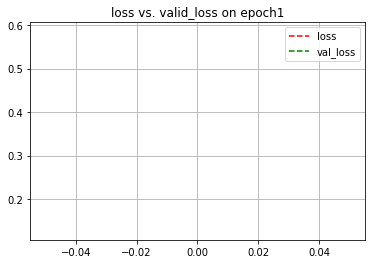

1000/1000 [==============================] - 57s 57ms/step - loss: 0.5835 - acc: 0.7666 - val_loss: 0.1291 - val_acc: 0.9578
Epoch 2/50
1092/1000 [================================] - 7s 7ms/step - loss: 0.1103 - acc: 0.9602

Epoch 00002: saving model to experimentmodel02-valloss0.11-valacc.hdf5


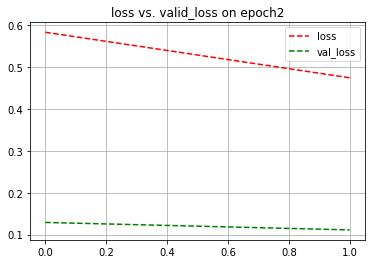

1000/1000 [==============================] - 22s 22ms/step - loss: 0.4747 - acc: 0.8014 - val_loss: 0.1112 - val_acc: 0.9602
Epoch 3/50
1092/1000 [================================] - 8s 7ms/step - loss: 0.1174 - acc: 0.9628

Epoch 00003: saving model to experimentmodel03-valloss0.12-valacc.hdf5


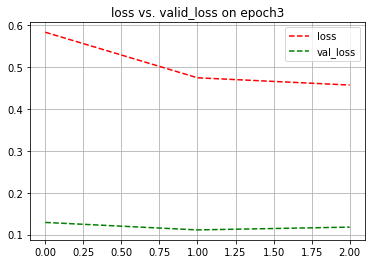

1000/1000 [==============================] - 24s 24ms/step - loss: 0.4574 - acc: 0.8046 - val_loss: 0.1179 - val_acc: 0.9628
Epoch 4/50
1092/1000 [================================] - 8s 7ms/step - loss: 0.1053 - acc: 0.9606

Epoch 00004: saving model to experimentmodel04-valloss0.11-valacc.hdf5


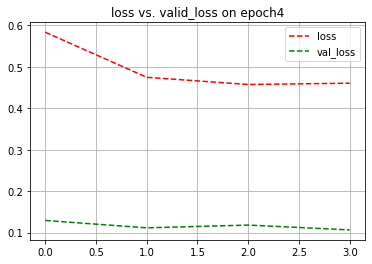

1000/1000 [==============================] - 24s 24ms/step - loss: 0.4605 - acc: 0.8055 - val_loss: 0.1062 - val_acc: 0.9606
Epoch 5/50
1092/1000 [================================] - 7s 6ms/step - loss: 0.0960 - acc: 0.9642

Epoch 00005: saving model to experimentmodel05-valloss0.10-valacc.hdf5


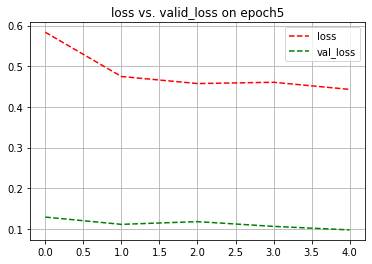

1000/1000 [==============================] - 21s 21ms/step - loss: 0.4430 - acc: 0.8083 - val_loss: 0.0976 - val_acc: 0.9642
Epoch 6/50
 573/1000 [================>.............] - ETA: 3s - loss: 0.1052 - acc: 0.9617

In [ ]:
# this is the batch generator for generating data during model training.
class KerasBatchGenerator(object):
    
    ###########################################################################
    # data shape:
    #   (number_of_files)(INSTRUMENTS, number_of_ts_in_midi, NUMBER_FEATRUES_OCTAVE)
    # num_steps:
    #   the number of time steps in one unrolled LSTM model
    # batch_size:
    #   number of samples in one mini-batch
    # vocabulary:
    #   number of categories in output
    # skip_step:
    #   steps to skip when generate the training samples
    ###########################################################################
    
    def __init__(self, data, num_steps, batch_size, vocabulary, skip_step=3):
        # save the variables, indexes
        self.data = data
        self.num_steps = num_steps
        self.batch_size = batch_size
        self.vocabulary = vocabulary
        self.current_index = 0 # index of t in current midifile
        self.file_index = 0 # the index of current midifile
        self.skip_step = skip_step
        
        
    # generate function called at the beginning of each batch, yield input and output data
    def generate(self):
        # define dimensions for inputs and outputs
        x = np.zeros((self.batch_size, self.num_steps, INSTRUMENTS * NUMBER_FEATURES_OCTAVE), dtype=np.bool)
        y = np.zeros((self.batch_size, self.num_steps, self.vocabulary), dtype=np.bool)
        
        while True:
            for i in range(self.batch_size):
                # the ith sample in the current batch
                
                if self.current_index + self.num_steps >= len(self.data[self.file_index][0]):
                    self.current_index = 0
                    self.file_index = (self.file_index + 1) % len(self.data)
                    
                while len(self.data[self.file_index][0]) < self.num_steps:
                    self.file_index = (self.file_index + 1) % len(self.data)
                    
                # set values for input and output data
                x[i, :, :NUMBER_FEATURES_OCTAVE] = self.data[self.file_index][0, self.current_index : self.current_index + self.num_steps, :]
                x[i, 1:, NUMBER_FEATURES_OCTAVE:] = self.data[self.file_index][1, self.current_index : self.current_index + self.num_steps - 1, :]
                y[i, :, :] = self.data[self.file_index][1, self.current_index : self.current_index + self.num_steps, :self.vocabulary]
                
                self.current_index += self.skip_step
                
            yield x, y


# train and validation data batch generators.
train_data_generator = KerasBatchGenerator(train_data, num_steps, batch_size,
                                           vocabulary, skip_step=skip_step)
valid_data_generator = KerasBatchGenerator(valid_data, num_steps, batch_size,
                                           vocabulary, skip_step=skip_step)

#--------------------------------------------

# define input sequence
'''sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(sequence, sequence, epochs=300, verbose=0)
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])'''

#---------------------------------------------
#n_in = len(sequence)
n_in = len(train_data)
# define model structure
model = Sequential()
model.add(Dropout(dropout, input_shape=(num_steps, NUMBER_FEATURES_OCTAVE * INSTRUMENTS)))
model.add(TimeDistributed(Dense(embedding_size)))
#model.add((LSTM(128, input_shape=(num_steps, NUMBER_FEATURES_OCTAVE * INSTRUMENTS), return_sequences=True)))
model.add((LSTM(hidden_size, return_sequences=False)))
# THIS OUTPUT IS THE ENCODED FEATURE VECTOR OF THE INPUT DATA
model.add(RepeatVector(3)) # BRIDGE BETWEEN ENCODER-DECODER

# Decoder:
model.add((LSTM(hidden_size, return_sequences=True)))
#model.add((LSTM(128, return_sequences=True)))
model.add(Dropout(dropout))
model.add(TimeDistributed(Dense(vocabulary)))
model.add(Activation('softmax'))
optimizer = Adam(lr=lr, decay=decay_rate)

# define model structure
'''model = Sequential()
model.add(Dropout(dropout, input_shape=(num_steps, NUMBER_FEATURES_OCTAVE * INSTRUMENTS)))
model.add(TimeDistributed(Dense(embedding_size)))
#model.add(Bidirectional(LSTM(hidden_size, return_sequences=True)))
model.add(LSTM(hidden_size, input_shape=(num_steps, NUMBER_FEATURES_OCTAVE * INSTRUMENTS), return_sequences=True))
model.add(RepeatVector(input_shape=(num_steps, NUMBER_FEATURES_OCTAVE * INSTRUMENTS)))
model.add((LSTM(hidden_size, input_shape=(num_steps, NUMBER_FEATURES_OCTAVE * INSTRUMENTS), return_sequences=True))
#model.add(Dropout(dropout))
model.add(TimeDistributed(Dense(vocabulary)))
model.add(Activation('softmax'))
optimizer = Adam(lr=lr, decay=decay_rate)'''

model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy']) #added top 3 acc
print(model.summary())

#----------------------------------------------------------------------------
# save model at end of each epoch
#checkpointer = ModelCheckpoint(filepath=experiment_path + 'model{epoch:02d}-valloss{val_loss:.2f}-valacc{val_acc:.2f}.hdf5', verbose=1)
checkpointer = ModelCheckpoint(filepath=experiment_path + 'model{epoch:02d}-valloss{val_loss:.2f}-valacc.hdf5', verbose=1)

# plot losses at the end of each epoch
class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.logs = []
        
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        plt.figure()
        plt.plot(self.x, self.losses, 'r--', label='loss')
        plt.plot(self.x, self.val_losses, 'g--', label='val_loss')
        plt.title('loss vs. valid_loss on epoch{}'.format(self.i))
        plt.legend()
        plt.grid()
        plt.savefig(experiment_path + 'loss vs.valid_loss epoch{}.svg'.format(self.i), format='svg')
        plt.show()
        
plot_losses = PlotLosses()

# calculate the number of steps needed for each epoch (one step per batch)
steps_per_epoch = 0
for i in range(len(train_data)):
    steps_per_epoch += len(train_data[i][0] - num_steps) // (batch_size * skip_step)
validation_steps = 0
for i in range(len(valid_data)):
    validation_steps += len(valid_data[i][0] - num_steps) // (batch_size * skip_step)


# model training!
'''His = model.fit_generator(train_data_generator.generate(), train_data_generator.generate(),
                    steps_per_epoch, num_epochs,
                    validation_data=valid_data_generator.generate(),
                    validation_steps=validation_steps,
                    callbacks=[checkpointer, plot_losses])'''

His = model.fit_generator(train_data_generator.generate(),
                          epochs=num_epochs, steps_per_epoch=1000,
                          validation_data=valid_data_generator.generate(),
                        validation_steps=validation_steps,
                        callbacks=[checkpointer, plot_losses])
                          #verbose=0)
# fit model
'''model.fit(sequence, sequence, epochs=300, verbose=0)
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])'''




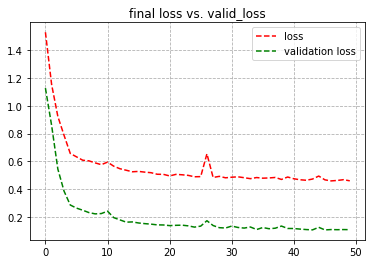

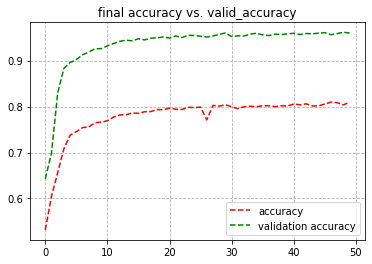

In [116]:
# plot losses in the end.
plt.figure()
plt.plot(His.history['loss'], 'r--', label='loss')
plt.plot(His.history['val_loss'], 'g--', label='validation loss')
plt.title('final loss vs. valid_loss')
plt.legend()
plt.grid(linestyle = "--")
plt.savefig(experiment_path + 'final loss vs. valid_loss.svg', format='svg')
plt.show()

# plot accuracies in the end~
plt.figure()
plt.plot(His.history['acc'], 'r--', label='accuracy')
plt.plot(His.history['val_acc'], 'g--', label='validation accuracy')
plt.title('final accuracy vs. valid_accuracy')
plt.legend()
plt.grid(linestyle = "--")
plt.savefig(experiment_path + 'final accuracy vs. valid_accuracy.svg', format='svg')
plt.show()

# save losses and accuracies during training~
np.save(experiment_path + 'History.loss.npy', His.history['loss'])
np.save(experiment_path + 'History.val_loss.npy', His.history['val_loss'])
np.save(experiment_path + 'History.acc.npy', His.history['acc'])
np.save(experiment_path + 'History.val_acc.npy', His.history['val_acc'])

# save the final model at the last epoch
model.save(experiment_path + 'final_model.hdf5')

# Generation

In [48]:
yhat = model.predict(train_data_generator.generate(),steps=32)
print(yhat.shape)
print(yhat)

(1792, 32, 14)
[[[6.7023464e-02 1.5729023e-04 6.8426237e-02 ... 5.7982691e-03
   3.5388440e-01 4.1422856e-01]
  [8.1185795e-02 6.9766393e-05 7.0618957e-02 ... 5.2614352e-03
   3.4595692e-01 4.0500915e-01]
  [8.0252409e-02 5.3081294e-05 7.0127994e-02 ... 4.9425825e-03
   3.4856686e-01 4.0575680e-01]
  ...
  [7.9488240e-02 4.6000616e-05 7.0116088e-02 ... 4.8325774e-03
   3.5114029e-01 4.0481204e-01]
  [7.9488568e-02 4.5999870e-05 7.0116237e-02 ... 4.8325798e-03
   3.5114074e-01 4.0481091e-01]
  [7.9488888e-02 4.5999266e-05 7.0116393e-02 ... 4.8325835e-03
   3.5114121e-01 4.0480980e-01]]

 [[6.7024082e-02 1.5729868e-04 6.8426579e-02 ... 5.7984702e-03
   3.5388571e-01 4.1422474e-01]
  [8.1186645e-02 6.9770897e-05 7.0619263e-02 ... 5.2616517e-03
   3.4595793e-01 4.0500557e-01]
  [8.0252625e-02 5.3083400e-05 7.0128031e-02 ... 4.9427035e-03
   3.4856793e-01 4.0575477e-01]
  ...
  [7.9488136e-02 4.6001987e-05 7.0115805e-02 ... 4.8326459e-03
   3.5114169e-01 4.0481102e-01]
  [7.9488464e-02 4.60

In [36]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug  8 21:31:19 2018

@author: fj123
@description: The script will use a selected model to generate accompaniment for midi melodies.
use command line arguments:
    midifile.mid --model_file model.hdf5 --diversity divf
the midiefile is the midi that includes the melody you want to generate accomapniemnt with, model_file
should be a model that have an input dimension of (batch_size, num_steps, INSTRUMENTS * NUMBER_FEATRUES_OCTAVE) and 
an output dimension of (batch_size, num_steps, vacabulary).
"""


from keras.models import load_model
import numpy as np
import utils
import argparse

# define constants
NUMBER_FEATURES_OCTAVE = utils.NUMBER_FEATURES_OCTAVE # 12 midi_notes + sustain + rest + beat_start
NUMBER_FEATURES = utils.NUMBER_FEATURES # 128 midi_notes + sustain + rest + beat_start
INSTRUMENTS = utils.INSTRUMENTS # number of instruments in midifile
num_steps = 32
vocabulary = 14

import easydict
import tensorflow as tf

In [77]:
args = easydict.EasyDict({
        "midi_file": 'experiment/jingle_bells.mid',
        "model_file": 'experimentmodel25-valloss1.44-valacc.hdf5',
        "ignore": [], #if we want to ignore the drums track, it is usually 9
        "diversity": 2
    })

midi_file = args.midi_file
model_file = args.model_file
diversity = args.diversity
#diversity = 2

# load the deep learning model and data for the melodeis
model = tf.keras.models.load_model(model_file)
test_data_raw = utils.load_melody_data(midi_file)
utils.to_monophonic(test_data_raw)
test_data = utils.to_octave(test_data_raw)

# sample a note from the probability distribution.
# This helper function is copied from keras lstm examples at:
# https://github.com/keras-team/keras/blob/master/examples/lstm_text_generation.py
def sample(prediction, diversity=2):
    prediction = np.asarray(prediction).astype('float64')
    prediction = np.log(prediction) / diversity
    prediction_exp = np.exp(prediction)
    prediction = prediction_exp / np.sum(prediction_exp)
    probs = np.random.multinomial(1, prediction, 1)
    return np.argmax(probs)

----load melody data from midifile: experiment/jingle_bells.mid
convert music into monophonic...
convert music into within one octave...


/home/pablo/miniconda3/envs/ai37/lib/python3.7/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


In [78]:
# generate accompaniment from left to right.
test_data[1, num_steps:, :] = 0
i = 0
while i + num_steps < len(test_data[0]):
    x = np.zeros((1, num_steps, INSTRUMENTS * NUMBER_FEATURES_OCTAVE), dtype=np.bool)
    x[:, :, :NUMBER_FEATURES_OCTAVE] = test_data[0, i : i + num_steps, :]
    x[:, 1:, NUMBER_FEATURES_OCTAVE:] = test_data[1, i : i + num_steps - 1, :]
    
    prediction = model.predict(x)
    # predict_note = np.argmax(prediction[0, num_steps - 1, :])
    predict_note = sample(prediction[0, num_steps - 1, :], diversity)
    
    test_data[1, i + num_steps - 1, predict_note] = 1
    
    i += 1
    
data = utils.reverse_octave(test_data)
si = data

# combine the generated accompaniment with the original melodies.
#data_new = np.copy(test_data_raw)
#data_new[1, :, :] = data[1, :, :]

# print the generated new music piece and save the music into midi file.
utils.print_data(si)
utils.generate_midi(si, midi_file[:len(midi_file)-4] + '-generate-' + model_file[:len(model_file)-5] + '-{}.mid'.format(diversity))


convert music within octave back into full piano roll...
*********************************
melody for the data is:
G4  --  --  --  E4  --  --  --  D4  --  --  --  C4  --  --  --  
00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  

G4  --  --  --  --  --  --  --  --  --  --  --  --  --  --  00  
00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  --  00  

G4  --  --  --  E4  --  --  --  D4  --  --  --  C4  --  --  --  
--  D3  --  A#3 D3  00  A#3 G3  00  --  C3  --  G3  00  --  F3  

A4  --  --  --  --  --  --  --  --  --  --  --  --  --  --  00  
C3  --  00  G3  C3  E3  G3  A#3 D3  --  B3  --  --  00  D3  00  

A4  --  --  --  F4  --  --  --  E4  --  --  --  D4  --  --  --  
00  00  D3  --  00  --  --  --  A#3 C3  B3  00  00  D3  E3  00  

B4  --  --  --  --  --  --  --  --  --  --  --  --  --  --  00  
00  00  D3  E3  E3  B3  --  00  D3  B3  G3  C3  --  --  A#3 C3  

G4  --  --  --  G4  --  --  --  F4  --  --  --  D4  --  --  --  
D3  00  D3  C3  00  G3  D3  00

In [90]:
data_new

array([[[False, False, False, ..., False,  True,  True],
        [False, False, False, ..., False,  True, False],
        [False, False, False, ..., False,  True, False],
        ...,
        [False, False, False, ...,  True, False, False],
        [False, False, False, ...,  True, False, False],
        [False, False, False, ...,  True, False, False]],

       [[False, False, False, ..., False,  True,  True],
        [False, False, False, ..., False,  True, False],
        [False, False, False, ..., False,  True, False],
        ...,
        [False, False, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])

In [ ]:
type(valid_data)